In [ ]:
# Muhsin Ciftci, Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob

import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
plt.style.use('gadfly_theme')

In [ ]:
stops_eng = set(stopwords.words('english'))
stops_eng.add('rt') #remove rt for retweets

# 0. Download Data

Check Tweets across Languages

In [ ]:
## FROM OLD DATA, DOES NOT MATTER FOR LANGUAGE CLASSIFICATION
# NEW DATA DOES NOT HAVE OTHER LANGUAGES
df_april_2 = pd.read_csv('april22', dtype = {'id':str, 'author_id':str, 'in_reply_to_user_id':str})
df_may_2   = pd.read_csv('may5', dtype = {'id':str, 'author_id':str, 'in_reply_to_user_id':str})
df_june_2  = pd.read_csv('june1', dtype = {'id':str, 'author_id':str, 'in_reply_to_user_id':str})

df_lang_april = df_april_2.groupby('lang')['lang'].value_counts().sort_values(ascending=False)
df_lang_may   = df_may_2.groupby('lang')['lang'].value_counts().sort_values(ascending=False)
df_lang_june  = df_june_2.groupby('lang')['lang'].value_counts().sort_values(ascending=False)

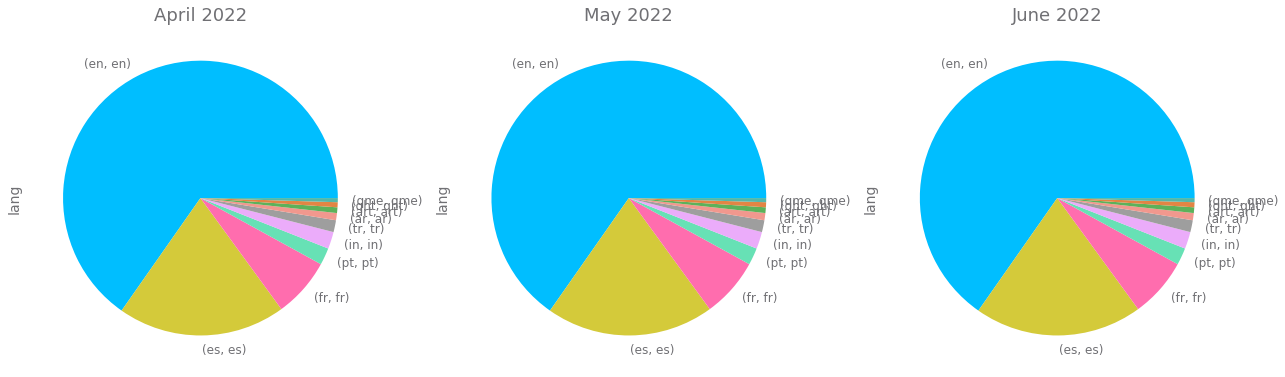

In [ ]:
plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)
df_lang_april.head(10).plot(kind = 'pie')
plt.title('April 2022')

plt.subplot(1, 3, 2)
df_lang_may.head(10).plot(kind = 'pie')
plt.title('May 2022')

plt.subplot(1, 3, 3)
df_lang_june.head(10).plot(kind = 'pie')
plt.title('June 2022')
plt.tight_layout()
plt.savefig('Charts/tweets_lang_pie.png')
plt.show()

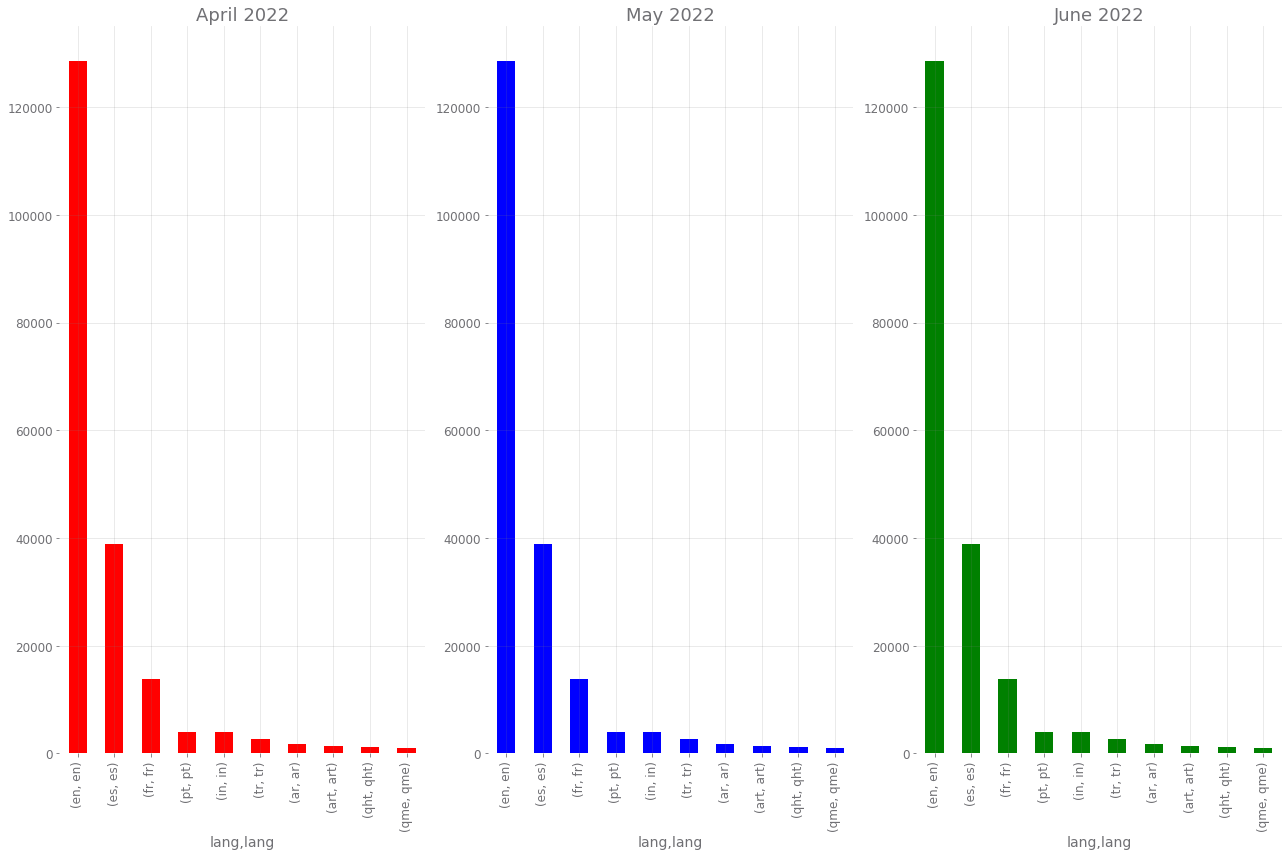

In [ ]:
plt.figure(figsize = (18, 12))

plt.subplot(1, 3, 1)
df_lang_april.head(10).plot(kind = 'bar', color = 'red')
plt.title('April 2022')

plt.subplot(1, 3, 2)
df_lang_may.head(10).plot(kind = 'bar', color = 'blue')
plt.title('May 2022')

plt.subplot(1, 3, 3)
df_lang_june.head(10).plot(kind = 'bar', color = 'green')
plt.title('June 2022')
plt.tight_layout()
plt.savefig('Charts/tweets_lang.png')
plt.show()

Tweet Counts

In [ ]:
words_in_tweet_april1 = [tweet.lower().split() for tweet in df_april1.text_clean_sentiment.astype(str)]
words_in_tweet_april22 = [tweet.lower().split() for tweet in df_april22.text_clean_sentiment.astype(str)]
words_in_tweet_may5 = [tweet.lower().split() for tweet in df_may5.text_clean_sentiment.astype(str)]
words_in_tweet_june1 =  [tweet.lower().split() for tweet in df_june1.text_clean_sentiment.astype(str)]

In [ ]:
# List of all words across tweets
all_words_april1 = list(itertools.chain(*words_in_tweet_april1))
all_words_april22 = list(itertools.chain(*words_in_tweet_april22))
all_words_may5   = list(itertools.chain(*words_in_tweet_may5))
all_words_june1  = list(itertools.chain(*words_in_tweet_june1))

# Create counter
counts_no_april1 = collections.Counter(all_words_april1)
counts_no_april22 = collections.Counter(all_words_april22)
counts_no_may5   = collections.Counter(all_words_may5)
counts_no_june1  = collections.Counter(all_words_june1)

In [ ]:
final_april1 = pd.DataFrame(counts_no_april1.most_common(10), columns=['words', 'count'])
final_april1 = final_april1[final_april1['words'].str.len() > 3] # Clean "'"

final_april22 = pd.DataFrame(counts_no_april22.most_common(10), columns=['words', 'count'])
final_april22 = final_april22[final_april22['words'].str.len() > 3] # Clean "'"


final_may5   = pd.DataFrame(counts_no_may5.most_common(10), columns=['words', 'count'])
final_may5 = final_may5[final_may5['words'].str.len() > 3] # Clean "'"

final_june1  = pd.DataFrame(counts_no_june1.most_common(10), columns=['words', 'count'])
final_june1  = final_june1[final_june1['words'].str.len() > 3] # Clean "'"

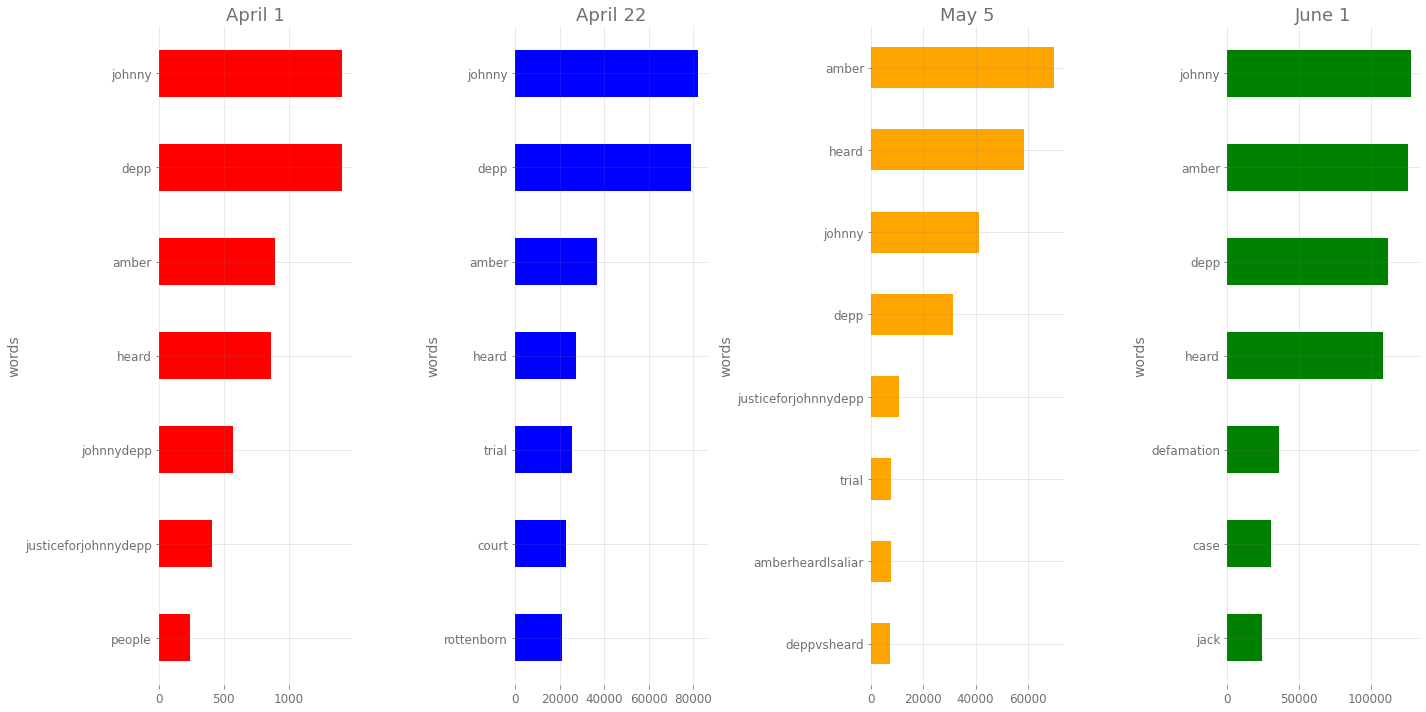

In [ ]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(figsize=(20, 10), nrows = 1, ncols = 4)

axes = [ax1, ax2, ax3, ax4]
dfs  = [final_april1, final_april22, final_may5, final_june1]
titles = ['April 1', 'April 22', 'May 5', 'June 1']
colors = ['red', 'blue', 'orange', 'green']

for i in range(4):
    plt.subplot(1, 4, i + 1)
    dfs[i].sort_values(by = 'count').plot.barh(x = 'words', y = 'count', ax = axes[i], color = colors[i], legend = False)
    axes[i].set_title(titles[i])
    
plt.tight_layout()
plt.savefig('Charts/tweet_word_counts')
plt.show()

## 2.2 Use Hugging Face

In [ ]:
# Use This one
#from transformers import pipeline
#classifier = pipeline("sentiment-analysis")

In [ ]:
#for i in final_april['words']:
#    a = classifier(i)
#    print(a)

# 4. Sentiment Across Categories

In [ ]:
# Read new data
april1  = pd.read_csv('clean-hastag/team_April1_clean.csv')
april22 = pd.read_csv('clean-hastag/team_April22_clean.csv')
may5    = pd.read_csv('clean-hastag/team_May5_clean.csv')
june1   = pd.read_csv('clean-hastag/team_June1_clean.csv')

In [ ]:
# Write data, filtered
april22[april22['Support_JD'] == 1].to_csv('April22_Support_JD')
april22[april22['Support_AH'] == 1].to_csv('April22_Support_AH')

april1[april1['Support_JD'] == 1].to_csv('April1_Support_JD')
april1[april1['Support_AH'] == 1].to_csv('April1_Support_AH')

may5[may5['Support_JD'] == 1].to_csv('May5_Support_JD')
may5[may5['Support_AH'] == 1].to_csv('May5_Support_AH')

june1[june1['Support_JD'] == 1].to_csv('June1_Support_JD')
june1[june1['Support_AH'] == 1].to_csv('June1_Support_AH')

## 4.1 Jonny Depp Sentiment

In [ ]:
month_JD = ["April1_Support_JD", "April22_Support_JD", "May5_Support_JD", "June1_Support_JD"]

for t in month_JD:
    print({t: textbob_all(t)}, "\n")

{'April1_Support_JD': [0.0, 100.0, 0.0]} 

{'April22_Support_JD': [0.0, 100.0, 0.0]} 

{'May5_Support_JD': [0.0, 100.0, 0.0]} 

{'June1_Support_JD': [0.0, 100.0, 0.0]} 



## 4.2 AH- Sentiment

In [ ]:
month_AH = ["April1_Support_AH", "April22_Support_AH", "May5_Support_AH", "June1_Support_AH"]

for t in month_JD:
    print({t: textbob_all(t)}, "\n")

{'April1_Support_JD': [0.0, 100.0, 0.0]} 

{'April22_Support_JD': [0.0, 100.0, 0.0]} 

{'May5_Support_JD': [0.0, 100.0, 0.0]} 

{'June1_Support_JD': [0.0, 100.0, 0.0]} 



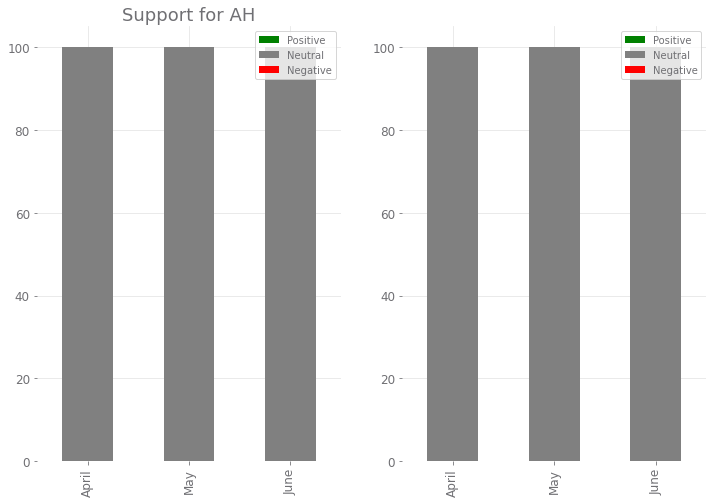

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols=2)

plt.subplot(1, 2, 1)
sent_data_JD.plot(kind = 'bar', stacked = True, color = ['g', 'gray', 'r'], ax = ax1, figsize = (12,8))
ax1.set_title('Support for JD')

plt.subplot(1, 2, 2)
sent_data_JD.plot(kind = 'bar', stacked = True, color = ['g', 'gray', 'r'], ax = ax2, figsize = (12,8))
ax1.set_title('Support for AH')

plt.savefig('Charts/sentiment_AH_JD')
plt.show()